# House Prices project
With this project I want to explore more ML concepts, algorithms and methods. Furthermore I want to consolidate what I learnt in previous projects.
This project will be composed in EDA, Preprocessing, Feature Engineering, FastAPIs and Dockerization.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import skew
import seaborn as sns

In [2]:
## load data into df
houses_train_df = pd.read_csv("train.csv")
houses_test_df = pd.read_csv("test.csv")

In [3]:
houses_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses_train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
houses_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houses_train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
missing = houses_train_df.isnull().sum()
missing_pct = (missing/ len(houses_train_df)) * 100
missing_df = pd.DataFrame({'missing': missing, 'percent': missing_pct})
missing_df[missing_df['missing']>0].sort_values('percent', ascending=False)

,missing,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


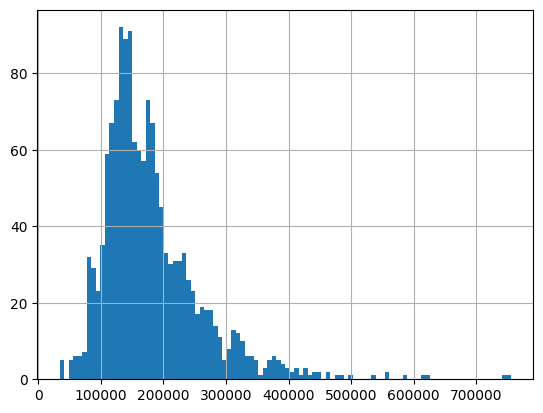

In [8]:
sale_prices_hist = houses_train_df['SalePrice'].hist(bins=100)
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sale_prices_hist.png", format="png")

In [9]:
numeric_cols = houses_train_df.select_dtypes(include=[np.number]).columns
categorical_cols = houses_train_df.select_dtypes(include=['object']).columns
print(f"Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}")

Numeric: 38, Categorical: 43


In [10]:
# Evaluate correlation with target (top predictors)
correlations = houses_train_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
correlations.head(10)  # Top 10 correlated features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [11]:
print(f"SalePrice skewness: {skew(houses_train_df['SalePrice']):.2f}")

SalePrice skewness: 1.88


In [12]:
# SalePrice is skewed so use log transform
houses_train_df["SalePrice_log"] = np.log(houses_train_df['SalePrice']) 

In [13]:
## add featrue HouseAge
houses_train_df['HouseAge'] = 2010 - houses_train_df['YearBuilt']

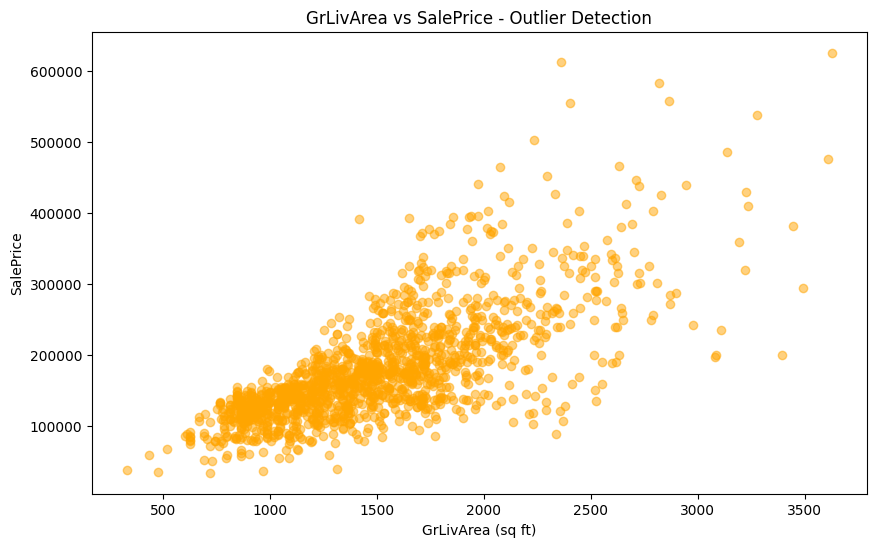

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(houses_train_df['GrLivArea'], houses_train_df['SalePrice'], alpha=0.5, color='Orange')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice - Outlier Detection')
plt.savefig('figures/grlivArea_vs_saleprice.png', format='png')
plt.show()

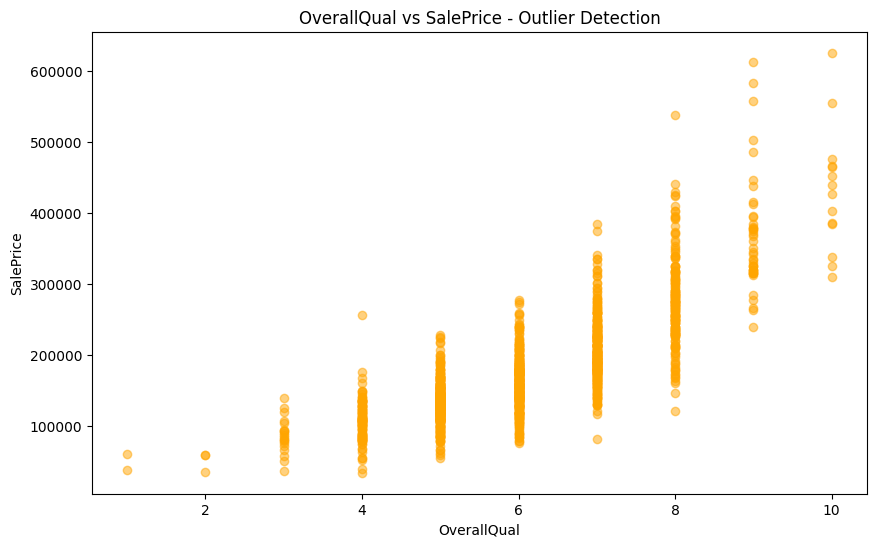

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(houses_train_df['OverallQual'], houses_train_df['SalePrice'], alpha=0.5, color='Orange')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice - Outlier Detection')
plt.savefig('figures/overallqual_vs_saleprice.png', format='png')
plt.show()

In [15]:
## Remouve previous outliers >4000 GrLivArea
houses_train_df = houses_train_df[~((houses_train_df['GrLivArea']>4000) & (houses_train_df['SalePrice']<3000000))]

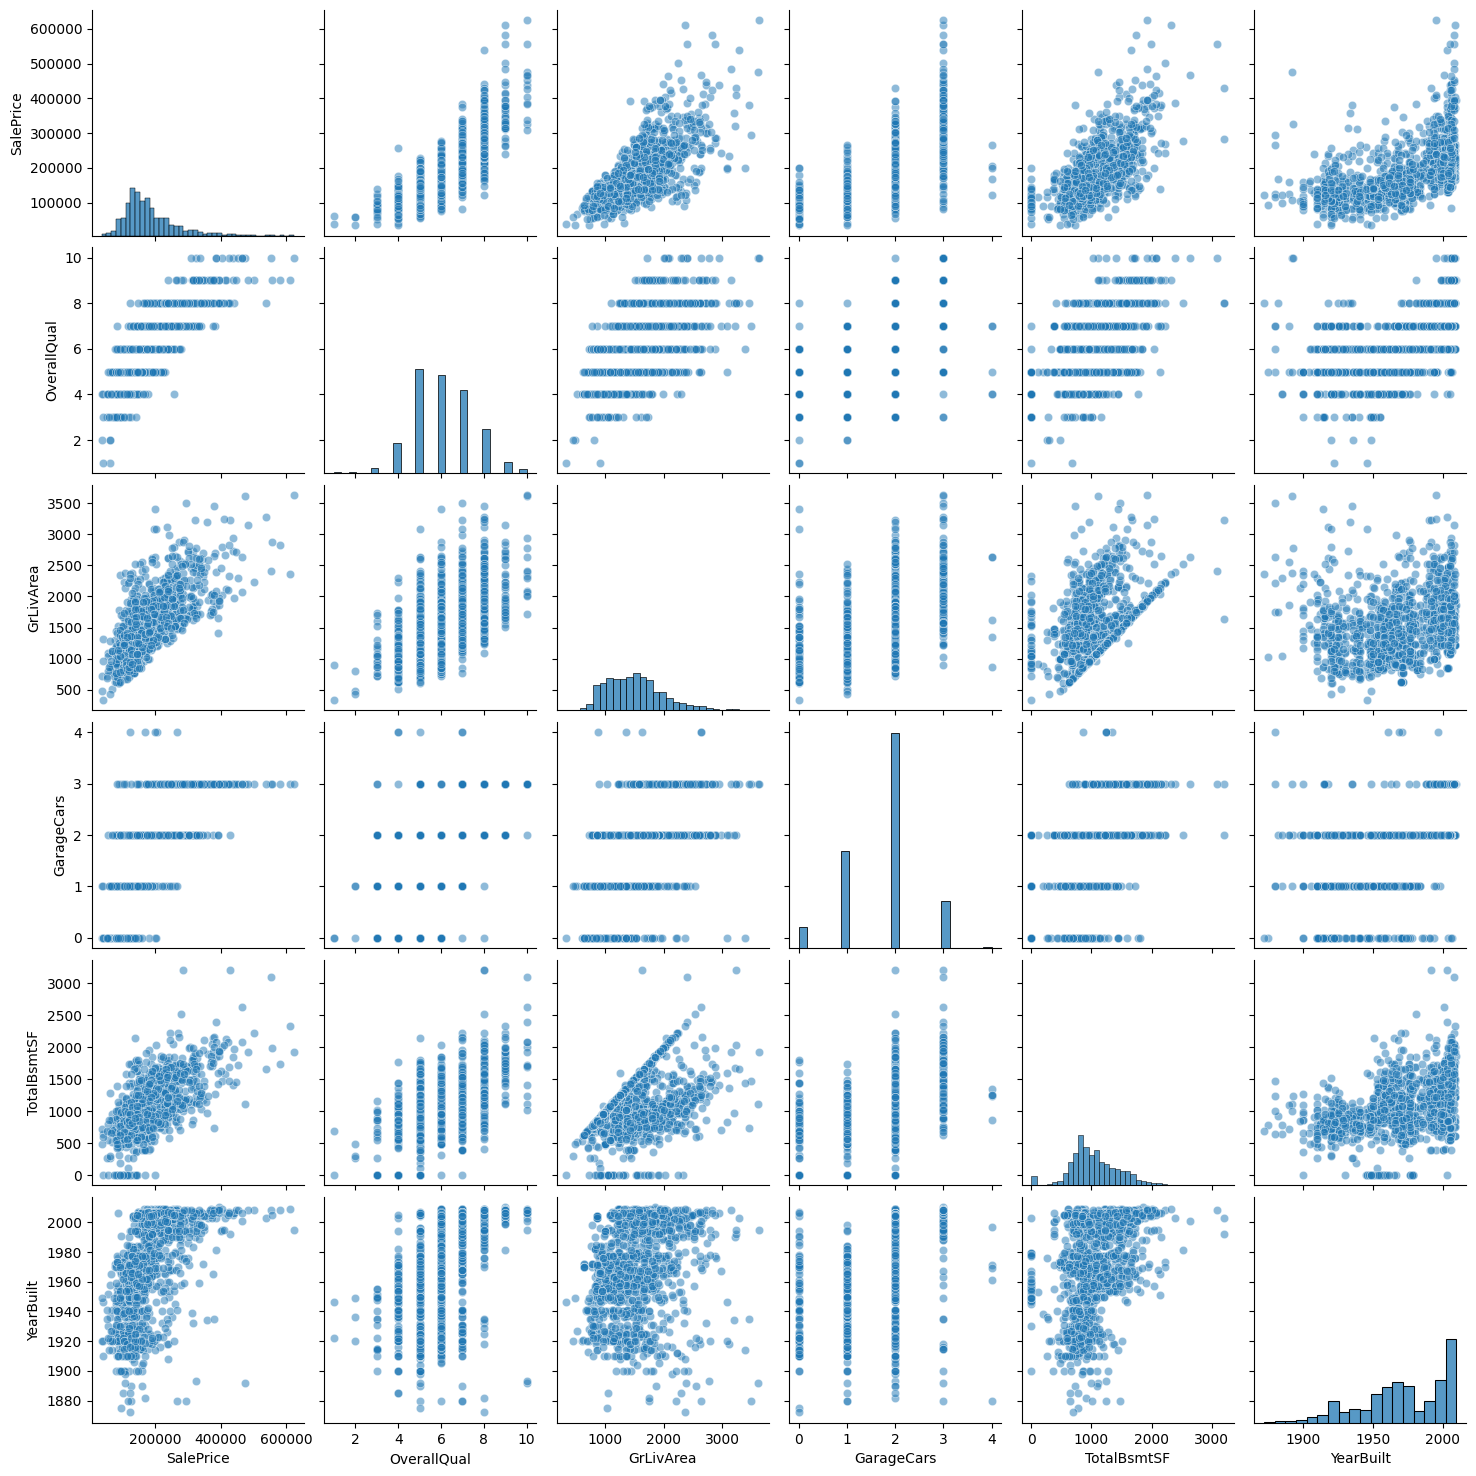

In [20]:
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(houses_train_df[top_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.savefig('figures/pairplot_top_features.png')
plt.show()

## Data Qaulity Assestment
The dataset is composed by 1460 rows with 81 columns each. The dtypes within the dataset are float, int and object (string or others): This means that we will need to handle features with scalers, one-hot-encoding and other techniques. Well, there are also columns with lot of missing values like `Alley`,`PoolQC`, `MiscFeature`, etc. which probably will be deleted or may be influent for the regression task. The datset can be entirely handled by my pc since I have 64GB of RAM available.

From `describe()` method it is evident that:
- `SalePrice` has std() ~79K and mean() ~181K which means high variance since ~66% of houses has a price between 181+-79k.
- `PoolArea` has 75th percentile == 0 which means that there are few houses with pool
- `YearBuilt` has range 1872-2010 which means that binning is needed or feature 'age'
 
Anyway for the moment which column is more important for the regression task cannot be assessed considering that of course there are columns that may point to more expensive or cheaper houses either.

Another interesting aspect is that the distribution of `SalePrice` is basically unimodal, with one peak around 180K, and skewed trhoug low prices. There are outliers >500K though. 

## Outlier Detection

GrLivArea shows strong positive correlation with SalePrice. Scatter plot reveals 2 anomalous data points: houses with >4000 sqft selling for <200K. These will be removed before modeling as they likely represent forced sales or data errors.

## Feature Analysis: OverallQual

OverallQual shows the strongest correlation with SalePrice (~0.79). The relationship is clearly monotonic with no anomalous outliers. Variance increases at higher quality levels, which is expected behavior for premium properties.